In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import mpmath as mp
import numpy as np
import scipy as sc
from mpl_toolkits import mplot3d
from array import *
from scipy.integrate import *
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from numpy.random import normal
from numpy import hstack

from statsmodels.distributions.empirical_distribution import ECDF
from matplotlib.ticker import FuncFormatter, MultipleLocator

!pip install pymannkendall
import pymannkendall as mk

plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 100
# plt.rcParams['figure.figsize'] = [10.24, 7.6]
# plt.rcParams['figure.dpi'] = 300

In [2]:
naon = pd.read_csv("n_jul_sep.csv")
naop = pd.read_csv("p_jul_sep.csv")

In [3]:
naon


,Unnamed: 0,yymo,Unnamed: 0.1,Unnamed: 0.1.1,sno,yy,mo,dd,total_wl,precipitation,...,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity,nint_twl_pcp,nint_twl_sflow,nint_sflow_ssurge,nint_pcp_ssurg
0,12,196808,28.0,1331.00,1332.00,1968.0,8.0,24.00,1.440000,0.510000,...,0.939564,196808.0,-0.01,1.74000,30.300000,1.233138,1.233138,1.447023,1.604679,1.390794
1,17,197008,45.5,2057.00,2058.00,1970.0,8.0,20.00,1.430000,3.320000,...,0.627566,197008.0,-1.79,1.71500,64.800000,1.442688,1.442688,1.212546,1.072804,1.302945
2,43,197709,120.0,4594.00,4595.00,1977.0,9.0,17.00,1.680000,0.000000,...,0.924264,197709.0,-0.64,1.68000,0.000000,1.198011,1.198011,1.510455,1.473288,1.160844
3,46,197809,128.0,4915.00,4916.00,1978.0,9.0,5.00,1.770000,6.970000,...,0.991840,197809.0,-0.78,1.77000,43.900000,1.766033,1.766033,1.015045,1.023843,1.774831
4,72,199107,311.0,8705.00,8706.00,1991.0,7.0,1.00,1.330000,0.340000,...,0.930129,199107.0,-1.57,1.69000,17.900000,1.023779,1.023779,1.275532,1.598304,1.346551
5,76,199608,407.0,10590.00,10591.00,1996.0,8.0,30.00,1.620000,0.000000,...,0.927387,199608.0,-0.66,1.73000,45.400000,1.175634,1.175634,0.946322,0.934655,1.163968
6,78,199809,472.0,11312.00,11313.00,1998.0,9.0,6.00,1.960000,20.200000,...,0.994581,199809.0,-1.70,1.96000,29.800000,1.926814,1.926814,1.920184,1.917315,1.923945
7,85,199909,491.0,11696.00,11697.00,1999.0,9.0,25.00,1.607333,1.063333,...,0.935611,199909.0,-2.24,1.70700,8.236667,1.302945,1.302945,1.624867,1.638850,1.316928
8,90,200009,502.0,12054.00,12055.00,2000.0,9.0,25.00,1.695000,0.540000,...,0.963726,200009.0,-1.45,1.69500,15.600000,1.435739,1.435739,1.388499,1.386651,1.433890
9,93,200109,522.0,12408.00,12409.00,2001.0,9.0,20.00,1.377000,0.000000,...,0.168048,200109.0,-1.98,1.75000,101.000000,0.917634,0.917634,1.120936,0.607931,0.404628


In [4]:
naop

,Unnamed: 0,yymo,Unnamed: 0.1,Unnamed: 0.1.1,sno,yy,mo,dd,total_wl,precipitation,...,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity,pint_twl_pcp,pint_twl_sflow,pint_sflow_ssurge,pint_pcp_ssurg
0,28,198509,203.0,7032.0,7033.0,1985.0,9.0,30.0,1.510,0.300,...,0.951039,198509.0,0.13,1.720,0.30,1.259658,1.259658,0.989864,1.079179,1.348974
1,40,199109,312.0,8775.0,8776.0,1991.0,9.0,9.0,1.660,2.580,...,0.912278,199109.0,0.37,1.660,30.50,1.595308,1.595308,1.571720,1.529262,1.552850
2,50,199309,345.0,9517.0,9518.0,1993.0,9.0,20.0,1.720,6.250,...,0.938034,199309.0,1.15,1.720,14.00,1.739704,1.739704,1.596328,1.562094,1.705470
3,59,199509,383.5,10245.0,10246.0,1995.0,9.0,20.0,1.860,1.665,...,0.987314,199509.0,1.22,1.860,31.29,1.529612,1.529612,1.318022,1.314006,1.525596
4,64,199609,408.0,10618.0,10619.0,1996.0,9.0,27.0,1.560,2.070,...,0.874410,199609.0,0.07,1.660,19.80,1.513834,1.513834,1.511220,1.482532,1.485146
5,71,199709,443.0,10958.0,10959.0,1997.0,9.0,17.0,1.660,0.300,...,0.845595,199709.0,1.80,1.660,1.46,1.352671,1.352671,1.256343,1.147201,1.243529
6,86,200308,589.0,13074.0,13075.0,2003.0,8.0,31.0,1.482,0.300,...,0.774576,200308.0,0.63,1.659,10.50,1.228293,1.228293,1.124315,1.068532,1.172511
7,88,200409,622.5,13459.5,13460.5,2004.0,9.0,20.5,1.751,20.600,...,0.983680,200409.0,0.02,1.751,47.10,1.882889,1.882889,1.863796,1.869788,1.888882
8,92,200909,682.0,14870.0,14871.0,2009.0,9.0,19.0,1.658,3.400,...,0.957542,200909.0,0.33,1.658,31.70,1.630626,1.630626,1.523078,1.529198,1.636746


In [5]:
# naon.groupby(naon.yymo).(['emp_pcp', 'emp_twl', 'emp_sflow', 'emp_skewv']).mean()
naon_avg=naon.groupby(naon.yymo).mean()
naon_avg

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,sno,yy,mo,dd,total_wl,precipitation,streamflow,...,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity,nint_twl_pcp,nint_twl_sflow,nint_sflow_ssurge,nint_pcp_ssurg
yymo,,,,,,,,,,,,,,,,,,,,,
196808,12,28.0,1331.00,1332.00,1968.0,8.0,24.00,1.440000,0.510000,72.500000,...,0.939564,196808.0,-0.01,1.74000,30.300000,1.233138,1.233138,1.447023,1.604679,1.390794
197008,17,45.5,2057.00,2058.00,1970.0,8.0,20.00,1.430000,3.320000,40.200000,...,0.627566,197008.0,-1.79,1.71500,64.800000,1.442688,1.442688,1.212546,1.072804,1.302945
197709,43,120.0,4594.00,4595.00,1977.0,9.0,17.00,1.680000,0.000000,53.000000,...,0.924264,197709.0,-0.64,1.68000,0.000000,1.198011,1.198011,1.510455,1.473288,1.160844
197809,46,128.0,4915.00,4916.00,1978.0,9.0,5.00,1.770000,6.970000,8.890000,...,0.991840,197809.0,-0.78,1.77000,43.900000,1.766033,1.766033,1.015045,1.023843,1.774831
199107,72,311.0,8705.00,8706.00,1991.0,7.0,1.00,1.330000,0.340000,73.300000,...,0.930129,199107.0,-1.57,1.69000,17.900000,1.023779,1.023779,1.275532,1.598304,1.346551
199608,76,407.0,10590.00,10591.00,1996.0,8.0,30.00,1.620000,0.000000,5.580000,...,0.927387,199608.0,-0.66,1.73000,45.400000,1.175634,1.175634,0.946322,0.934655,1.163968
199809,78,472.0,11312.00,11313.00,1998.0,9.0,6.00,1.960000,20.200000,228.000000,...,0.994581,199809.0,-1.70,1.96000,29.800000,1.926814,1.926814,1.920184,1.917315,1.923945
199909,85,491.0,11696.00,11697.00,1999.0,9.0,25.00,1.607333,1.063333,84.466667,...,0.935611,199909.0,-2.24,1.70700,8.236667,1.302945,1.302945,1.624867,1.638850,1.316928
200009,90,502.0,12054.00,12055.00,2000.0,9.0,25.00,1.695000,0.540000,38.000000,...,0.963726,200009.0,-1.45,1.69500,15.600000,1.435739,1.435739,1.388499,1.386651,1.433890


In [6]:
naop_avg=naop.groupby(naop.yymo).mean()
naop_avg

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,sno,yy,mo,dd,total_wl,precipitation,streamflow,...,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity,pint_twl_pcp,pint_twl_sflow,pint_sflow_ssurge,pint_pcp_ssurg
yymo,,,,,,,,,,,,,,,,,,,,,
198509,28,203.0,7032.0,7033.0,1985.0,9.0,30.0,1.510,0.300,14.9,...,0.951039,198509.0,0.13,1.720,0.30,1.259658,1.259658,0.989864,1.079179,1.348974
199109,40,312.0,8775.0,8776.0,1991.0,9.0,9.0,1.660,2.580,63.5,...,0.912278,199109.0,0.37,1.660,30.50,1.595308,1.595308,1.571720,1.529262,1.552850
199309,50,345.0,9517.0,9518.0,1993.0,9.0,20.0,1.720,6.250,64.6,...,0.938034,199309.0,1.15,1.720,14.00,1.739704,1.739704,1.596328,1.562094,1.705470
199509,59,383.5,10245.0,10246.0,1995.0,9.0,20.0,1.860,1.665,29.5,...,0.987314,199509.0,1.22,1.860,31.29,1.529612,1.529612,1.318022,1.314006,1.525596
199609,64,408.0,10618.0,10619.0,1996.0,9.0,27.0,1.560,2.070,62.2,...,0.874410,199609.0,0.07,1.660,19.80,1.513834,1.513834,1.511220,1.482532,1.485146
199709,71,443.0,10958.0,10959.0,1997.0,9.0,17.0,1.660,0.300,26.9,...,0.845595,199709.0,1.80,1.660,1.46,1.352671,1.352671,1.256343,1.147201,1.243529
200308,86,589.0,13074.0,13075.0,2003.0,8.0,31.0,1.482,0.300,26.2,...,0.774576,200308.0,0.63,1.659,10.50,1.228293,1.228293,1.124315,1.068532,1.172511
200409,88,622.5,13459.5,13460.5,2004.0,9.0,20.5,1.751,20.600,193.0,...,0.983680,200409.0,0.02,1.751,47.10,1.882889,1.882889,1.863796,1.869788,1.888882
200909,92,682.0,14870.0,14871.0,2009.0,9.0,19.0,1.658,3.400,56.3,...,0.957542,200909.0,0.33,1.658,31.70,1.630626,1.630626,1.523078,1.529198,1.636746


In [7]:
naon_avg['nint_twl_pcp']=   naon_avg['emp_pcp'] + naon_avg['emp_twl']          # 1) TWL and pcp
naon_avg['nint_twl_sflow']= naon_avg['emp_twl'] + naon_avg['emp_sflow']          # 2) TWL and streamflow 
naon_avg['nint_twl_ssurge']=naon_avg['emp_twl'] + naon_avg['emp_skewv']         # 3) TWL and skewsurge
naon_avg['nint_pcp_ssurg']= naon_avg['emp_pcp'] + naon_avg['emp_skewv']         #4) pcp and skewsurge

In [8]:
naop_avg['pint_twl_pcp']=   naop_avg['emp_pcp'] + naop_avg['emp_twl']           # 1) TWL and pcp
naop_avg['pint_twl_sflow']= naop_avg['emp_twl'] + naop_avg['emp_sflow']          # 2) TWL and streamflow 
naop_avg['pint_twl_ssurge']=naop_avg['emp_twl'] + naop_avg['emp_skewv']             # 3) TWL and skewsurge
naop_avg['pint_pcp_ssurg']= naop_avg['emp_pcp'] + naop_avg['emp_skewv']            #4) pcp and skewsurge

In [9]:
naon_avg

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,sno,yy,mo,dd,total_wl,precipitation,streamflow,...,nao_yymmo,nao_index,twl_max,prec_max,intensity,nint_twl_pcp,nint_twl_sflow,nint_sflow_ssurge,nint_pcp_ssurg,nint_twl_ssurge
yymo,,,,,,,,,,,,,,,,,,,,,
196808,12,28.0,1331.00,1332.00,1968.0,8.0,24.00,1.440000,0.510000,72.500000,...,196808.0,-0.01,1.74000,30.300000,1.233138,1.233138,1.447023,1.604679,1.390794,1.721471
197008,17,45.5,2057.00,2058.00,1970.0,8.0,20.00,1.430000,3.320000,40.200000,...,197008.0,-1.79,1.71500,64.800000,1.442688,1.442688,1.212546,1.072804,1.302945,1.394874
197709,43,120.0,4594.00,4595.00,1977.0,9.0,17.00,1.680000,0.000000,53.000000,...,197709.0,-0.64,1.68000,0.000000,1.198011,1.198011,1.510455,1.473288,1.160844,1.885694
197809,46,128.0,4915.00,4916.00,1978.0,9.0,5.00,1.770000,6.970000,8.890000,...,197809.0,-0.78,1.77000,43.900000,1.766033,1.766033,1.015045,1.023843,1.774831,1.974882
199107,72,311.0,8705.00,8706.00,1991.0,7.0,1.00,1.330000,0.340000,73.300000,...,199107.0,-1.57,1.69000,17.900000,1.023779,1.023779,1.275532,1.598304,1.346551,1.537486
199608,76,407.0,10590.00,10591.00,1996.0,8.0,30.00,1.620000,0.000000,5.580000,...,199608.0,-0.66,1.73000,45.400000,1.175634,1.175634,0.946322,0.934655,1.163968,1.866441
199809,78,472.0,11312.00,11313.00,1998.0,9.0,6.00,1.960000,20.200000,228.000000,...,199809.0,-1.70,1.96000,29.800000,1.926814,1.926814,1.920184,1.917315,1.923945,1.992031
199909,85,491.0,11696.00,11697.00,1999.0,9.0,25.00,1.607333,1.063333,84.466667,...,199909.0,-2.24,1.70700,8.236667,1.302945,1.302945,1.624867,1.638850,1.316928,1.857240
200009,90,502.0,12054.00,12055.00,2000.0,9.0,25.00,1.695000,0.540000,38.000000,...,200009.0,-1.45,1.69500,15.600000,1.435739,1.435739,1.388499,1.386651,1.433890,1.929300


In [10]:
naop_avg

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,sno,yy,mo,dd,total_wl,precipitation,streamflow,...,nao_yymmo,nao_index,twl_max,prec_max,intensity,pint_twl_pcp,pint_twl_sflow,pint_sflow_ssurge,pint_pcp_ssurg,pint_twl_ssurge
yymo,,,,,,,,,,,,,,,,,,,,,
198509,28,203.0,7032.0,7033.0,1985.0,9.0,30.0,1.510,0.300,14.9,...,198509.0,0.13,1.720,0.30,1.259658,1.259658,0.989864,1.079179,1.348974,1.812763
199109,40,312.0,8775.0,8776.0,1991.0,9.0,9.0,1.660,2.580,63.5,...,199109.0,0.37,1.660,30.50,1.595308,1.595308,1.571720,1.529262,1.552850,1.867015
199309,50,345.0,9517.0,9518.0,1993.0,9.0,20.0,1.720,6.250,64.6,...,199309.0,1.15,1.720,14.00,1.739704,1.739704,1.596328,1.562094,1.705470,1.910302
199509,59,383.5,10245.0,10246.0,1995.0,9.0,20.0,1.860,1.665,29.5,...,199509.0,1.22,1.860,31.29,1.529612,1.529612,1.318022,1.314006,1.525596,1.978643
199609,64,408.0,10618.0,10619.0,1996.0,9.0,27.0,1.560,2.070,62.2,...,199609.0,0.07,1.660,19.80,1.513834,1.513834,1.511220,1.482532,1.485146,1.777509
199709,71,443.0,10958.0,10959.0,1997.0,9.0,17.0,1.660,0.300,26.9,...,199709.0,1.80,1.660,1.46,1.352671,1.352671,1.256343,1.147201,1.243529,1.800332
200308,86,589.0,13074.0,13075.0,2003.0,8.0,31.0,1.482,0.300,26.2,...,200308.0,0.63,1.659,10.50,1.228293,1.228293,1.124315,1.068532,1.172511,1.604934
200409,88,622.5,13459.5,13460.5,2004.0,9.0,20.5,1.751,20.600,193.0,...,200409.0,0.02,1.751,47.10,1.882889,1.882889,1.863796,1.869788,1.888882,1.961367
200909,92,682.0,14870.0,14871.0,2009.0,9.0,19.0,1.658,3.400,56.3,...,200909.0,0.33,1.658,31.70,1.630626,1.630626,1.523078,1.529198,1.636746,1.908963


# 1) TWL and pcp (intensity) - neagtive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.9211586502250249, z=-0.09897433186107871, Tau=-0.02857142857142857, s=-3.0, var_s=408.3333333333333, slope=-0.002110161899999996, intercept=1.3421331113)


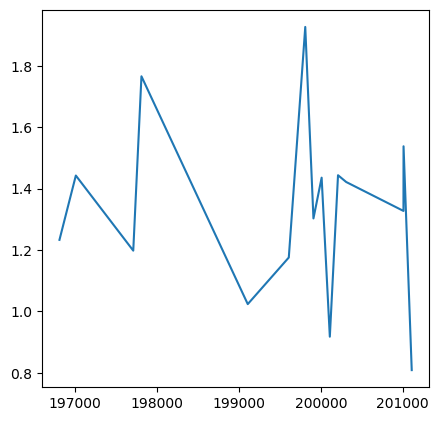

In [11]:
plt.plot(naon_avg.nao_yymmo,naon_avg.nint_twl_pcp)
result = mk.original_test(naon_avg.nint_twl_pcp)
print(result) #nint_twl_pcp	nint_twl_sflow	nint_twl_ssurge	nint_pcp_ssurg, nint_pcp_ssurg

# 2) TWL and streamflow (intensity) - neagtive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.9211586502250249, z=0.09897433186107871, Tau=0.02857142857142857, s=3.0, var_s=408.3333333333333, slope=0.002071911199999965, intercept=1.3374665316000003)


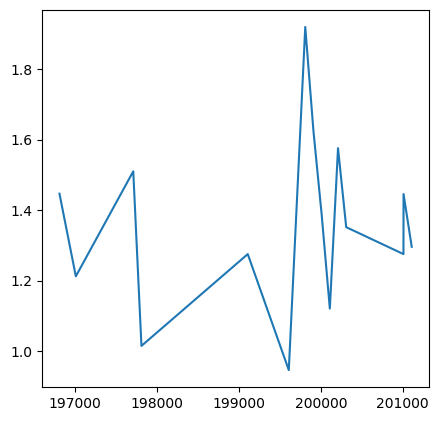

In [12]:
plt.plot(naon_avg.nao_yymmo,naon_avg.nint_twl_sflow)
result = mk.original_test(naon_avg.nint_twl_sflow)
print(result) #nint_twl_pcp	nint_twl_sflow	nint_twl_ssurge	nint_pcp_ssurg

# 3) TWL and skewsurge (intensity) - neagtive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.8430852292699837, z=-0.19794866372215741, Tau=-0.047619047619047616, s=-5.0, var_s=408.3333333333333, slope=-0.0025761246818181553, intercept=1.8753897512727271)


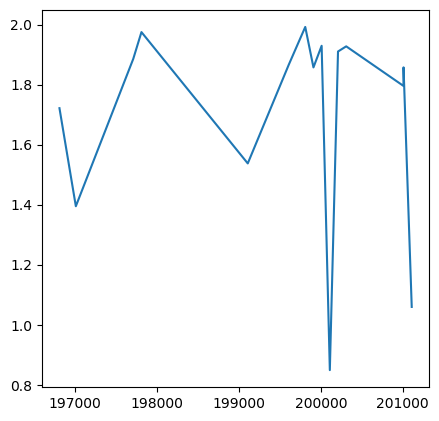

In [13]:
plt.plot(naon_avg.nao_yymmo, naon_avg.nint_twl_ssurge)
result = mk.original_test(naon_avg.nint_twl_ssurge)
print(result) #nint_twl_pcp	nint_twl_sflow	nint_twl_ssurge	nint_pcp_ssurg

# 4) pcp and skewsurge (intensity) - neagtive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.9211586502250249, z=-0.09897433186107871, Tau=-0.02857142857142857, s=-3.0, var_s=408.3333333333333, slope=-0.0031663054666666744, intercept=1.3687152022666667)


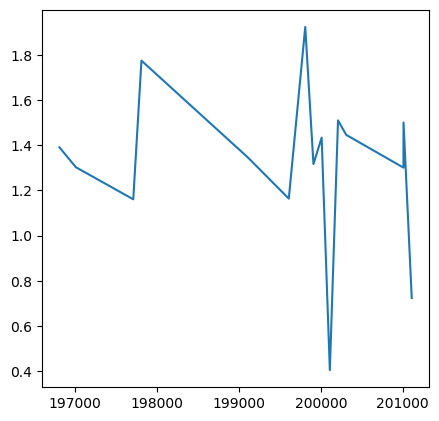

In [14]:
plt.plot(naon_avg.nao_yymmo,naon_avg.nint_pcp_ssurg)
result = mk.original_test(naon_avg.nint_pcp_ssurg)
print(result) #nint_twl_pcp	nint_twl_sflow	nint_twl_ssurge	nint_pcp_ssurg

# 1)TWL and pcp (intensity) - positive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.9169652366288645, z=0.10425720702853739, Tau=0.05555555555555555, s=2.0, var_s=92.0, slope=0.011824010514285724, intercept=1.482316350942857)


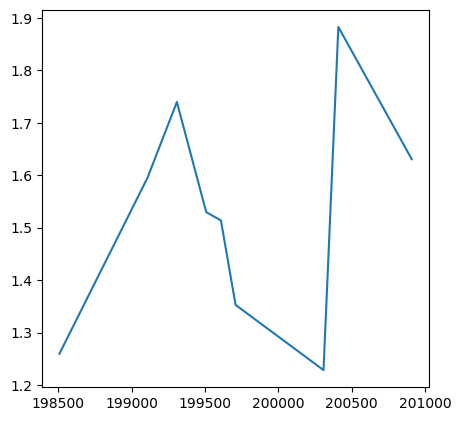

In [15]:
plt.plot(naop_avg.nao_yymmo,naop_avg.pint_twl_pcp)
result = mk.original_test(naop_avg.pint_twl_pcp)
print(result) #pint_twl_pcp	pint_twl_sflow	pint_twl_ssurge	pint_pcp_ssurg

# 2)TWL and streamflow (intensity)- positive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.7544541774940892, z=0.3127716210856122, Tau=0.1111111111111111, s=4.0, var_s=92.0, slope=0.02350822408333334, intercept=1.4171872996666666)


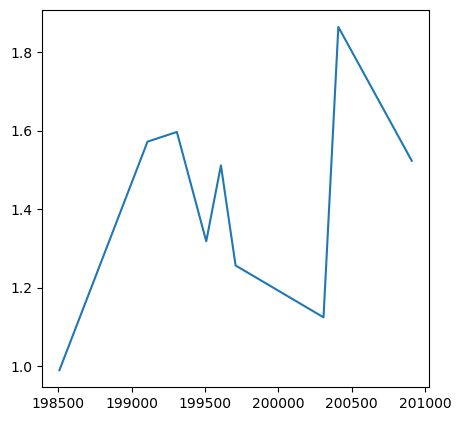

In [16]:
plt.plot(naop_avg.nao_yymmo,naop_avg.pint_twl_sflow)
result = mk.original_test(naop_avg.pint_twl_sflow)
print(result) #pint_twl_pcp	pint_twl_sflow	pint_twl_ssurge	pint_pcp_ssurg

# 3) TWL and skewsurge (intensity) - positive phase

Mann_Kendall_Test(trend='no trend', h=False, p=1.0, z=0, Tau=0.0, s=0.0, var_s=92.0, slope=0.00288473792857141, intercept=1.8554762212857143)


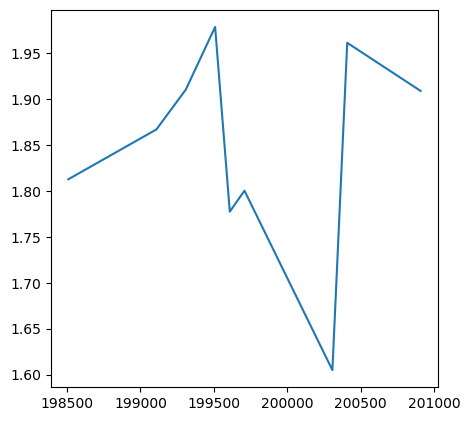

In [17]:
plt.plot(naop_avg.nao_yymmo,naop_avg.pint_twl_ssurge)
result = mk.original_test(naop_avg.pint_twl_ssurge)
print(result) #pint_twl_pcp	pint_twl_sflow	pint_twl_ssurge	pint_pcp_ssurg

# 4) pcp and skewsurge (intensity) - positive phase

Mann_Kendall_Test(trend='no trend', h=False, p=1.0, z=0, Tau=0.0, s=0.0, var_s=92.0, slope=0.00026562960714283934, intercept=1.5245335540714287)


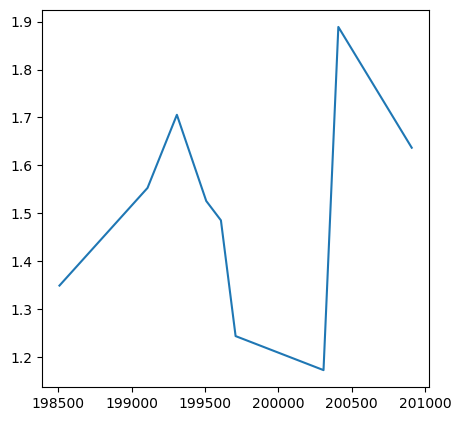

In [18]:
plt.plot(naop_avg.nao_yymmo,naop_avg.pint_pcp_ssurg)
result = mk.original_test(naop_avg.pint_pcp_ssurg)
print(result) #pint_twl_pcp	pint_twl_sflow	pint_twl_ssurge	pint_pcp_ssurg

# 1)TWL and pcp (intensity) - negative phase - correlation

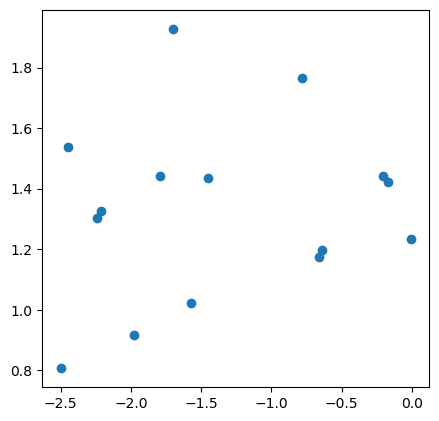

Kendall correlation coefficient: 0.105
Samples are uncorrelated (fail to reject H0) p=0.626


In [19]:
plt.scatter(naon_avg.nao_index,naon_avg.nint_twl_pcp)
plt.show()
coef, p = kendalltau(naon_avg.nao_index,naon_avg.nint_twl_pcp)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 2) TWL and streamflow (intensity) - neagtive phase - correlation

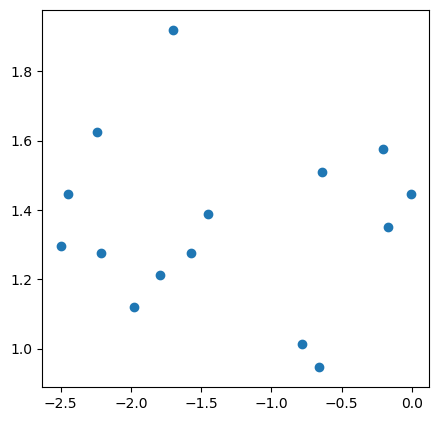

Kendall correlation coefficient: 0.010
Samples are uncorrelated (fail to reject H0) p=1.000


In [20]:
plt.scatter(naon_avg.nao_index,naon_avg.nint_twl_sflow)
plt.show()
coef, p = kendalltau(naon_avg.nao_index,naon_avg.nint_twl_sflow)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 3) TWL and skewsurge (intensity) - neagtive phase - correlation

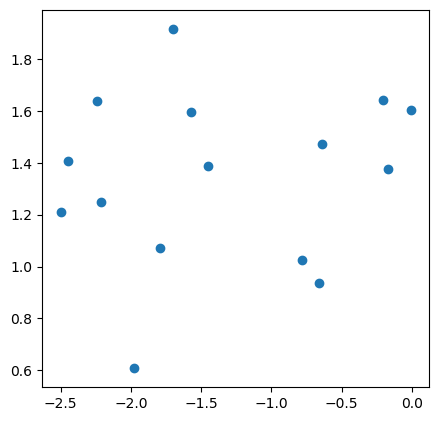

Kendall correlation coefficient: 0.105
Samples are uncorrelated (fail to reject H0) p=0.626


In [21]:
plt.scatter(naon_avg.nao_index,naon_avg.nint_sflow_ssurge)
plt.show()
coef, p = kendalltau(naon_avg.nao_index,naon_avg.nint_sflow_ssurge)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 4) pcp and skewsurge (intensity) - neagtive phase - correlation

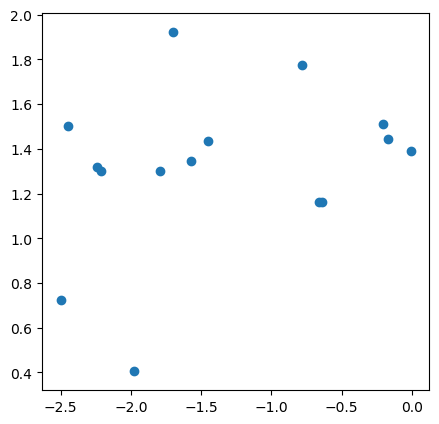

Kendall correlation coefficient: 0.181
Samples are uncorrelated (fail to reject H0) p=0.379


In [22]:
plt.scatter(naon_avg.nao_index,naon_avg.nint_pcp_ssurg)
plt.show()
coef, p = kendalltau(naon_avg.nao_index,naon_avg.nint_pcp_ssurg)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 1)TWL and pcp (intensity) - positive phase- correlation

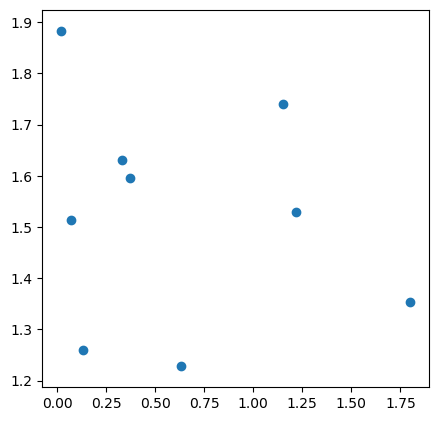

Kendall correlation coefficient: -0.222
Samples are uncorrelated (fail to reject H0) p=0.477


In [23]:
plt.scatter(naop_avg.nao_index,naop_avg.pint_twl_pcp)
plt.show()
coef, p = kendalltau(naop_avg.nao_index,naop_avg.pint_twl_pcp)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 2)TWL and streamflow (intensity)- positive phase- correlation

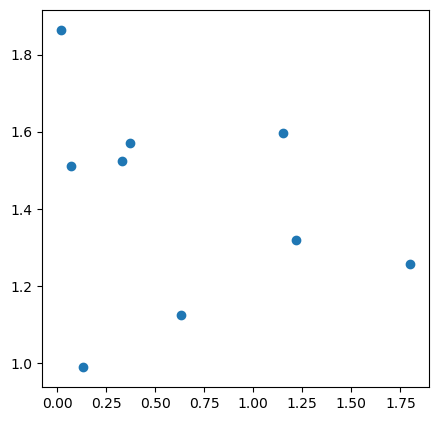

Kendall correlation coefficient: -0.167
Samples are uncorrelated (fail to reject H0) p=0.612


In [24]:
plt.scatter(naop_avg.nao_index,naop_avg.pint_twl_sflow)
plt.show()
coef, p = kendalltau(naop_avg.nao_index,naop_avg.pint_twl_sflow)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 3) TWL and skewsurge (intensity) - positive phase- correlation

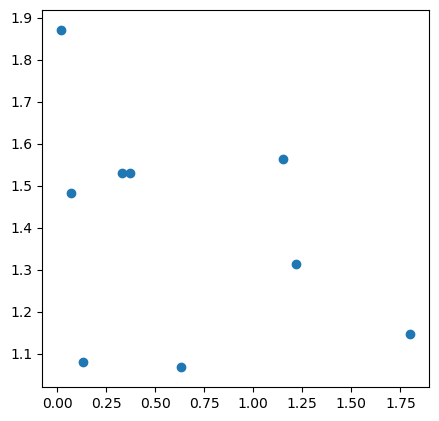

Kendall correlation coefficient: -0.222
Samples are uncorrelated (fail to reject H0) p=0.477


In [25]:
plt.scatter(naop_avg.nao_index,naop_avg.pint_sflow_ssurge)
plt.show()
coef, p = kendalltau(naop_avg.nao_index,naop_avg.pint_sflow_ssurge)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 4) pcp and skewsurge (intensity) - positive phase- correlation

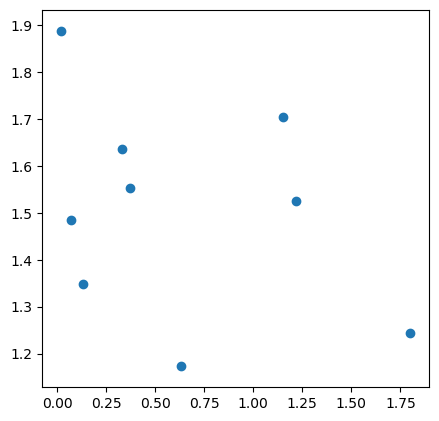

Kendall correlation coefficient: -0.278
Samples are uncorrelated (fail to reject H0) p=0.358


In [26]:
plt.scatter(naop_avg.nao_index,naop_avg.pint_pcp_ssurg)
plt.show()
coef, p = kendalltau(naop_avg.nao_index,naop_avg.pint_pcp_ssurg)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

In [27]:
# naon_avg.to_csv('naon_avg.csv')
# naop_avg.to_csv('naop_avg.csv')